教程地址：https://stackoverflow.com/questions/43331510/how-to-train-an-svm-classifier-on-a-satellite-image-using-python

In [1]:
import numpy as np
from skimage import io

img = io.imread('D:\Projects\VsCode\Python\img_processing_system\img\TFOv7.png')
print(img.shape)
rows, cols, bands = img.shape
print(rows, cols, bands)
classes = {'building': 0, 'vegetation': 1, 'water': 2}
n_classes = len(classes)
palette = np.uint8([
    [0, 255, 0], 
    [255, 0, 0], 
    [0, 0, 255]
    ])

(300, 300, 3)
300 300 3


In [2]:
print(palette)

[[  0 255   0]
 [255   0   0]
 [  0   0 255]]


# 非监督式学习

In [3]:
from sklearn.cluster import KMeans

X = img.reshape(rows*cols, bands)
print("X.shape: ",X.shape)
kmeans = KMeans(n_clusters=n_classes, random_state=3).fit(X)
print(kmeans.labels_)
print(np.unique(kmeans.labels_))
unsupervised = kmeans.labels_.reshape(rows, cols)
print(unsupervised)

X.shape:  (90000, 3)


Exception in thread Thread-4 (_readerthread):
Traceback (most recent call last):
  File "d:\Projects\VsCode\Python\img_processing_system\.conda\Lib\threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "d:\Projects\VsCode\Python\img_processing_system\.conda\Lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "d:\Projects\VsCode\Python\img_processing_system\.conda\Lib\threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "d:\Projects\VsCode\Python\img_processing_system\.conda\Lib\subprocess.py", line 1599, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "<frozen codecs>", line 322, in decode
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 4: invalid continuation byte


[1 0 0 ... 1 1 1]
[0 1 2]
[[1 0 0 ... 2 2 2]
 [1 2 0 ... 2 2 2]
 [1 0 1 ... 2 2 2]
 ...
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


In [4]:
print(type(palette[unsupervised]))
print(palette[unsupervised].shape)
print(palette[unsupervised])

<class 'numpy.ndarray'>
(300, 300, 3)
[[[255   0   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]]

 [[255   0   0]
  [  0   0 255]
  [  0 255   0]
  ...
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]]

 [[255   0   0]
  [  0 255   0]
  [255   0   0]
  ...
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]]

 ...

 [[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0 255   0]
  [255   0   0]
  [255   0   0]]

 [[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]]


## 问题：palette与unsupervised中的分类如何对应的？

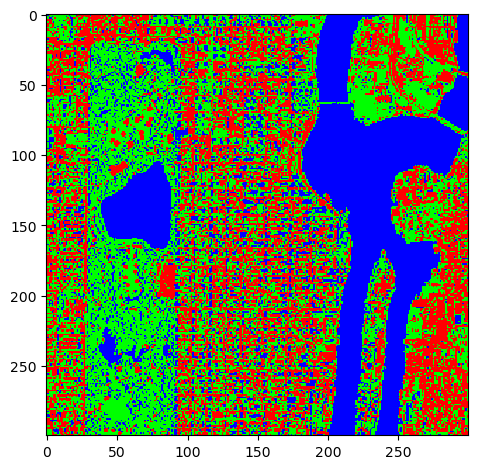

In [5]:
io.imshow(palette[unsupervised]) 


# 监督学习

In [6]:
supervised = n_classes * np.ones(shape=(rows, cols), dtype=int)
supervised[200:220, 150:170] = classes['building']
supervised[40:60, 40:60] = classes['vegetation']
supervised[100:120, 200:220] = classes['water']

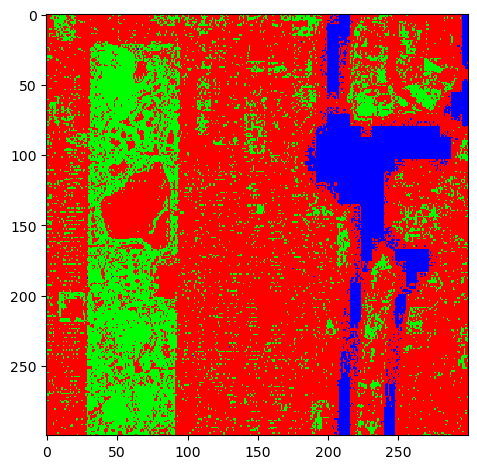

In [7]:
y = supervised.ravel() # 拉伸为1维
train = np.flatnonzero(supervised < n_classes) # 即找到标记为building，vegetation，water的下标
''' 你用来分析的
print(supervised < n_classes)
res = (supervised < n_classes).ravel()
idx_list = []
for i in range(0, len(res)):
    if(res[i]):
        idx_list.append(i)
print(idx_list)
print(train)
'''
test = np.flatnonzero(supervised == n_classes) # 即没有被标记为building，vegetation，water的下标


#from sklearn.svm import SVC
#clf = SVC(gamma='auto')
#clf.fit(X[train], y[train])

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, class_weight="balanced")
clf.fit(X[train], y[train])

y[test] = clf.predict(X[test])
supervised = y.reshape(rows, cols)

palette = np.uint8([
    [255, 0, 0], 
    [0, 255, 0],
    [0, 0, 255]
    ])

io.imshow(palette[supervised])